In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

In [8]:
df = pd.read_csv('CORP_prices_6_years_clean.csv')

In [84]:
def mape(y_true, y_pred, weights):
    mape = np.abs(y_true-y_pred)/np.abs(y_true)
    return np.average(mape, weights=weights)

In [39]:
ans_close = []
weights = []
for _, start_ind, end_ind in [(int(len(df[:381251])/10*i), int(len(df[:381251])/10*(i+5)), 
                                           int(len(df[:381251])/10 * (i + 6))) for i in range(5)]:
    ans_close.append(df[start_ind:end_ind]['CLOSE'].values)
    weights.append(df[start_ind:end_ind]['WEIGHT'].values)    

In [89]:
ans_full = df[381251:]['CLOSE'].values
weights_full = df[381251:]['WEIGHT'].values

## Calculate model quality

In [165]:
def get_quals(folder):
    
    quals_close = []
    quals_delta = []
    quals_return = []
    
    for i, name in enumerate(['0_close.csv',
     '0_delta.csv',
     '0_return.csv',
     '38125_close.csv',
     '38125_delta.csv',
     '38125_return.csv',
     '76250_close.csv',
     '76250_delta.csv',
     '76250_return.csv',
     '114375_close.csv',
     '114375_delta.csv',
     '114375_return.csv',
     '152500_close.csv',
     '152500_delta.csv',
     '152500_return.csv'
     ]):
       
        pred_type = name.split('_')[1][:-4]

        cur = pd.read_csv(f'{folder}/{name}').values.reshape(-1,)

        if pred_type == 'close':
            wmape = mape(ans_close[i//3], cur, weights[i//3])
            mape_ = mape(ans_close[i//3], cur, None)
            mae_ = mae(ans_close[i//3], cur)
            mse_ = mse(ans_close[i//3], cur)
            quals_close.append((wmape, mape_, mae_, mse_))

        elif pred_type == 'delta':
            wmape = mape(ans_close[i//3], cur, weights[i//3])
            mape_ = mape(ans_close[i//3], cur, None)
            mae_ = mae(ans_close[i//3], cur)
            mse_ = mse(ans_close[i//3], cur)
            quals_delta.append((wmape, mape_, mae_, mse_))

        elif pred_type == 'return':
            wmape = mape(ans_close[i//3], cur, weights[i//3])
            mape_ = mape(ans_close[i//3], cur, None)
            mae_ = mae(ans_close[i//3], cur)
            mse_ = mse(ans_close[i//3], cur)
            quals_return.append((wmape, mape_, mae_, mse_))
            
    for name in ('full_close.csv', 'full_delta.csv', 'full_return.csv'):
        cur = pd.read_csv(f'{folder}/{name}').values.reshape(-1,)
        pred_type = name.split('_')[1][:-4]
        
        if pred_type == 'close':
            wmape = mape(ans_full, cur, weights_full)
            mape_ = mape(ans_full, cur, None)
            mae_ = mae(ans_full, cur)
            mse_ = mse(ans_full, cur)
            quals_close.append((wmape, mape_, mae_, mse_))

        elif pred_type == 'delta':
            wmape = mape(ans_full, cur, weights_full)
            mape_ = mape(ans_full, cur, None)
            mae_ = mae(ans_full, cur)
            mse_ = mse(ans_full, cur)
            quals_delta.append((wmape, mape_, mae_, mse_))

        elif pred_type == 'return':
            wmape = mape(ans_full, cur, weights_full)
            mape_ = mape(ans_full, cur, None)
            mae_ = mae(ans_full, cur)
            mse_ = mse(ans_full, cur)
            quals_return.append((wmape, mape_, mae_, mse_))
            
    quals_close = np.array(quals_close)
    quals_delta = np.array(quals_delta)
    quals_return = np.array(quals_return)
    
    print(f'{np.round(quals_close[:,0].mean()*100, 3)} {np.round(quals_close[:,1].mean()*100,3)} {np.round(quals_close[:,2].mean(), 3)} {np.round(quals_close[:, 3].mean(), 3)} {np.round(np.std(quals_close[:,0]),4)}')
    print(f'{np.round(quals_delta[:,0].mean()*100, 3)} {np.round(quals_delta[:,1].mean()*100,3)} {np.round(quals_delta[:,2].mean(), 3)} {np.round(quals_delta[:, 3].mean(), 3)} {np.round(np.std(quals_delta[:,0]),4)}')
    print(f'{np.round(quals_return[:,0].mean()*100, 3)} {np.round(quals_return[:,1].mean()*100,3)} {np.round(quals_return[:,2].mean(), 3)} {np.round(quals_return[:, 3].mean(), 3)} {np.round(np.std(quals_return[:,0]),4)}')


    return quals_close, quals_delta, quals_return

In [546]:
def get_quals_mean(folder):
    
    quals = []
    
    for i, name in enumerate([['0_close.csv',
     '0_delta.csv',
     '0_return.csv'],
     ['38125_close.csv',
     '38125_delta.csv',
     '38125_return.csv'],
     ['76250_close.csv',
     '76250_delta.csv',
     '76250_return.csv'],
     ['114375_close.csv',
     '114375_delta.csv',
     '114375_return.csv'],
     ['152500_close.csv',
     '152500_delta.csv',
     '152500_return.csv']
     ]):
       

        cur_c = pd.read_csv(f'{folder}/{name[0]}').values.reshape(-1,)
        cur_d = pd.read_csv(f'{folder}/{name[1]}').values.reshape(-1,)
        cur_r = pd.read_csv(f'{folder}/{name[2]}').values.reshape(-1,)
        
        cur = (cur_c + cur_r)/2

        wmape = mape(ans_close[i], cur, weights[i])
        mape_ = mape(ans_close[i], cur, None)
        mae_ = mae(ans_close[i], cur)
        mse_ = mse(ans_close[i], cur)
        quals.append((wmape, mape_, mae_, mse_))

    names = ('full_close.csv', 'full_delta.csv', 'full_return.csv')

    cur_c = pd.read_csv(f'{folder}/{names[0]}').values.reshape(-1,)
    cur_d = pd.read_csv(f'{folder}/{names[1]}').values.reshape(-1,)
    cur_r = pd.read_csv(f'{folder}/{names[2]}').values.reshape(-1,)

    cur = (cur_c + cur_r)/2

    wmape = mape(ans_full, cur, weights_full)
    mape_ = mape(ans_full, cur, None)
    mae_ = mae(ans_full, cur)
    mse_ = mse(ans_full, cur)
    quals.append((wmape, mape_, mae_, mse_))
    
    quals = np.array(quals)

    print(f'{np.round(quals[:,0].mean()*100, 3)} {np.round(quals[:,1].mean()*100,3)} {np.round(quals[:,2].mean(), 3)} {np.round(quals[:, 3].mean(), 3)} {np.round(np.std(quals_close[:,0]),4)}')



    return quals

## Calculate ensemble quality

In [402]:
def ensemble(var):
    quals = []
    for i, (start_ind, _, _) in enumerate([(int(len(df[:381251])/10*i), int(len(df[:381251])/10*(i+5)), 
                                           int(len(df[:381251])/10 * (i + 6))) for i in range(5)]):
        pred = 0
        
        for folder in ['adaboost_pred',
 
 'huber_pred',
 
'NN_pred',
'gradboost_pred']:

#         for folder in os.listdir('Predictions'):
            
            pred += pd.read_csv(f'Predictions/{folder}/{start_ind}_{var}.csv').values.reshape(-1,)
            
        pred = pred/
        
        
        wmape = mape(ans_close[i], pred, weights[i])
        
        mape_ = mape(ans_close[i], pred, None)
        mae_ = mae(ans_close[i], pred)
        mse_ = mse(ans_close[i], pred)
        quals.append((wmape, mape_, mae_, mse_))
        
    pred = 0
        
    for folder in ['adaboost_pred',
 
 'huber_pred',
 
'NN_pred',
'gradboost_pred']:

#     for folder in os.listdir('Predictions'):
            pred += pd.read_csv(f'Predictions/{folder}/full_{var}.csv').values.reshape(-1,)  
    pred = pred/4
            
    wmape = mape(ans_full, pred, weights_full)
    mape_ = mape(ans_full, pred, None)
    mae_ = mae(ans_full, pred)
    mse_ = mse(ans_full, pred)
    quals.append((wmape, mape_, mae_, mse_))
    
    quals = np.array(quals)

    print(f'{np.round(quals[:,0].mean()*100, 3)} {np.round(quals[:,1].mean()*100,3)} {np.round(quals[:,2].mean(), 3)} {np.round(quals[:, 3].mean(), 3)} {np.round(np.std(quals_close[:,0]),4)}')
    return pred

In [176]:
naive = []
for _, start_ind, end_ind in [(int(len(df[:381251])/10*i), int(len(df[:381251])/10*(i+5)), 
                                           int(len(df[:381251])/10 * (i + 6))) for i in range(5)]:
    naive.append(df[start_ind:end_ind]['CLOSE_1'].values)

## Plot feature importance

In [ ]:
imp_close = pd.DataFrame()
imp_delta = pd.DataFrame()
imp_return = pd.DataFrame()
for name in os.listdir('Importance'):
    print(name)
    cur = pd.read_csv(f'Importance/{name}')
    imp_close = pd.concat([imp_close, cur['imp_close']], axis=1)
    imp_delta = pd.concat([imp_delta, cur['imp_delta']], axis=1)    
    imp_return = pd.concat([imp_return, cur['imp_return'].dropna()], axis=1)    

In [525]:
imp_return.columns = ['AdaB', 'Enet', 'GrB', 'Huber', 'Lasso', 'OLS', 'NN', 'RF', 'Ridge']

imp_return.index = df.drop(['CLOSE', 'DELTA', 'RETURN', 'TRADEDATE', 'WEIGHT'], 
                                                          axis=1).drop([f'CLOSE_{i}' for i in range(1,11)], axis=1).columns

imp_return.loc['COUPON_TYPE'] = imp_return.loc[['COUPON_TYPE_ Ипотечный',
       'COUPON_TYPE_ Переменный', 'COUPON_TYPE_ Плавающий',
       'COUPON_TYPE_ Постоянный', 'COUPON_TYPE_ Прочий']].sum()

imp_return.loc['TYPE'] = imp_return.loc['TYPE_exchange_bond']

imp_return = imp_return.drop(['BETA_ORD','BETA_DEF', 'BETA_TERM', 'BETA_DRF','COUPON_TYPE_ Ипотечный',
       'COUPON_TYPE_ Переменный', 'COUPON_TYPE_ Плавающий',
       'COUPON_TYPE_ Постоянный', 'COUPON_TYPE_ Прочий', 'TYPE_exchange_bond'])

imp_return = imp_return[['GrB', 'NN', 'AdaB', 'Huber']]

imp_return = imp_return.rank(method='max')

imp_return['mean_rank'] = imp_return.mean(axis=1)

imp_return = imp_return.sort_values(by='mean_rank', ascending=False)

In [543]:
imp_close.columns = ['AdaB', 'Enet', 'GrB', 'Huber', 'Lasso', 'OLS', 'NN', 'RF', 'Ridge']

imp_close.index = df.drop(['CLOSE', 'DELTA', 'RETURN', 'TRADEDATE', 'WEIGHT'],
                              axis=1).drop([f'delta_{i}' for i in range(2,11)], axis=1).columns
imp_close.loc['COUPON_TYPE'] = imp_close.loc[['COUPON_TYPE_ Ипотечный',
       'COUPON_TYPE_ Переменный', 'COUPON_TYPE_ Плавающий',
       'COUPON_TYPE_ Постоянный', 'COUPON_TYPE_ Прочий']].sum()

imp_close.loc['TYPE'] = imp_close.loc['TYPE_exchange_bond']

imp_close = imp_close.drop(['BETA_ORD','BETA_DEF', 'BETA_TERM', 'BETA_DRF','COUPON_TYPE_ Ипотечный',
       'COUPON_TYPE_ Переменный', 'COUPON_TYPE_ Плавающий',
       'COUPON_TYPE_ Постоянный', 'COUPON_TYPE_ Прочий', 'TYPE_exchange_bond'])

imp_close = imp_close[['GrB', 'NN', 'AdaB', 'Huber']]

imp_close = imp_close.rank(method='max')

imp_close['mean_rank'] = imp_close.mean(axis=1)

imp_close = imp_close.sort_values(by='mean_rank', ascending=False)

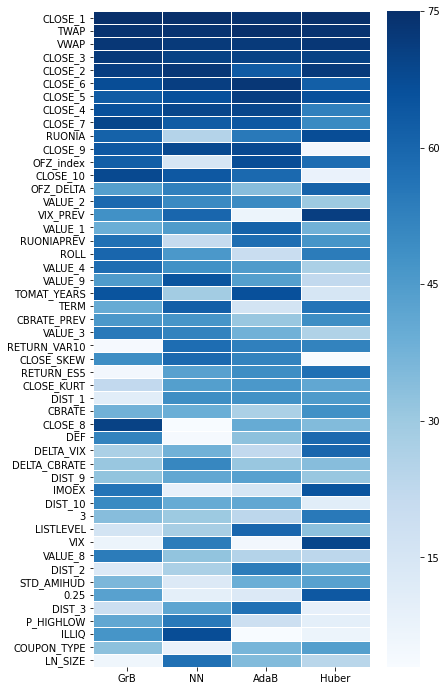

In [545]:
plt.figure(figsize=(6.3, 9.7))
res = sns.heatmap(imp_close.rank(method='max').drop('mean_rank', axis=1).head(50), cmap='Blues', linewidths=1)
plt.tight_layout()
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 1)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 1)
# res.tick_params(labelsize=10)
plt.savefig('Plots/importance_close.pdf')
# plt.show()

In [509]:
fig_width_pt = 455.244  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

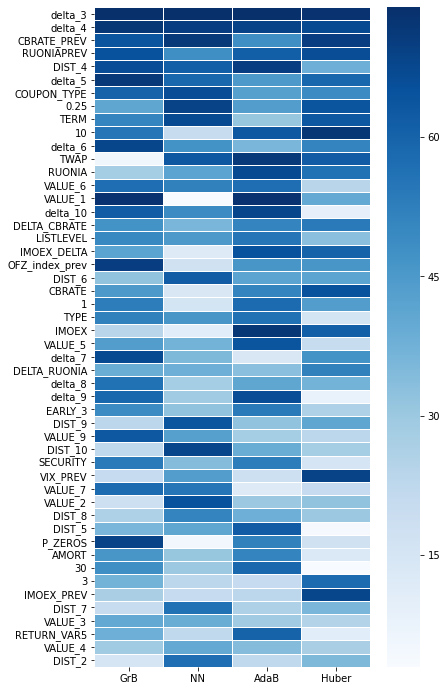

In [542]:
plt.figure(figsize=(6.3, 9.7))
res = sns.heatmap(imp_return.rank(method='max').drop('mean_rank', axis=1).head(50), cmap='Blues', linewidths=1)
plt.tight_layout()
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 1)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 1)
# res.tick_params(labelsize=10)
plt.savefig('Plots/importance.pdf')
# plt.show()